In [74]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extracting all ZIP files

In [76]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Colab Notebooks/localisation/archive.zip',"r") as zip:
    zip.printdir()
    zip.extractall('/content/drive/MyDrive/Colab Notebooks/localisation/')


Reading image data along with its xml file

In [77]:
directory='/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images'
file_paths=[]
for root, directories, files in os.walk(directory):
        files.sort()
        for filename in files:
            # join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)
        break

In [78]:
len(file_paths)

372

In [79]:
file_paths[0][-3:],file_paths[1][-3:]

('jpg', 'xml')

In [80]:
file_paths[:6]

['/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/cucumber_1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/cucumber_1.xml',
 '/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/cucumber_10.jpg',
 '/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/cucumber_10.xml',
 '/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/cucumber_11.jpg',
 '/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/cucumber_11.xml']

separating image and xml files

In [81]:
img_path=[]
xml_path=[]

for i,j in enumerate(file_paths):
    if i%2==0:
        img_path.append(j)
    else:
        xml_path.append(j)


In [82]:
len(img_path),len(xml_path)

(186, 186)

In [83]:
x=np.random.randint(0,186)
img_path[x],xml_path[x]

('/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/eggplant_33.jpg',
 '/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/eggplant_33.xml')

Using xmltodict to read data from xml file

In [84]:
! pip install xmltodict
import xmltodict

In [85]:
label={'no image':0,'cucumber':1,'eggplant':2,'mushroom':3}
label_to_name={1:'cucumber',2:'eggplant',3:'mushroom',0:'no image'}

In [86]:
data=[]
image_sizes=set()

for i,j in enumerate(xml_path):
    x=[]
    xml_data=open(j).read()
    # print(xml_data)
    data_dict=xmltodict.parse(xml_data)
    # print(data_dict)

    x.append(label[data_dict['annotation']['object']['name']])
    x.append(int(data_dict['annotation']['object']['bndbox']['xmin']))
    x.append(int(data_dict['annotation']['object']['bndbox']['ymin']))
    x.append(int(data_dict['annotation']['object']['bndbox']['xmax']))
    x.append(int(data_dict['annotation']['object']['bndbox']['ymax']))
    image_sizes.add(data_dict['annotation']['size']['width'])
    image_sizes.add(data_dict['annotation']['size']['height'])

    # print(x,image_sizes)
    # break

    data.append(x)





In [87]:
len(data),image_sizes

(186, {'227'})

In [88]:
data_dict

{'annotation': {'folder': 'single mushroom',
  'filename': 'mushroom_9.jpg',
  'path': 'C:\\Users\\Muhammed Buyukkinaci\\Downloads\\single mushroom\\mushroom_9.jpg',
  'source': {'database': 'Unknown'},
  'size': {'width': '227', 'height': '227', 'depth': '3'},
  'segmented': '0',
  'object': {'name': 'mushroom',
   'pose': 'Unspecified',
   'truncated': '0',
   'difficult': '0',
   'bndbox': {'xmin': '67', 'ymin': '38', 'xmax': '154', 'ymax': '172'}}}}

In [89]:
data[0],img_path[0],label

([1, 23, 42, 206, 199],
 '/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/cucumber_1.jpg',
 {'no image': 0, 'cucumber': 1, 'eggplant': 2, 'mushroom': 3})

In [90]:
import cv2

In [91]:
images=[]
img = cv2.imread(img_path[0], cv2.IMREAD_COLOR)

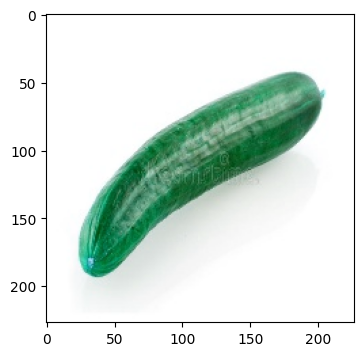

In [92]:
plt.rcParams['figure.figsize'] = (4,4)
plt.imshow(img)

functions to draw bounding box and add text to a bounding box

In [93]:
def draw_rectangle(img,bounds,color='red'):
    colors={'red':(255,0,0),'green':(0,255,0),'blue':(0,0,255)}
    c=colors.get(color.lower(),(255,0,0))
    return cv2.rectangle(img,(int(bounds[0]),int(bounds[1])),(int(bounds[2]),int(bounds[3])),c)



In [94]:
def add_text_to_boundingbox(img,cat,bounds,color='red'):
    colors={'red':(255,0,0),'green':(0,255,0),'blue':(0,0,255)}
    c=colors.get(color.lower(),(255,0,0))
    return cv2.putText(img,label_to_name[cat],(int(bounds[0]),int(bounds[1])-5),cv2.FONT_HERSHEY_SIMPLEX, .5,c,1,cv2.LINE_AA)


(<matplotlib.image.AxesImage at 0x7f95b516a980>, list)

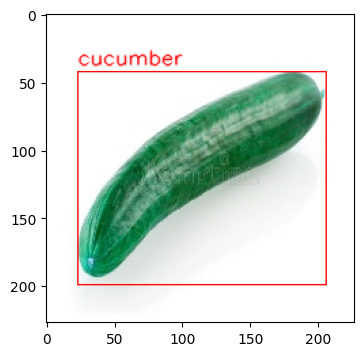

In [95]:
# img1=cv2.rectangle(img,(data[0][1],data[0][2]),(data[0][3],data[0][4]),(255,0,0))
img2=draw_rectangle(img,data[0][1:],'red')
img2=add_text_to_boundingbox(img,1,data[0][1:],'red')

plt.imshow(img2),type(data[0][1:])

this image dataset contains 3 classes of images

<Figure size 3000x2000 with 0 Axes>

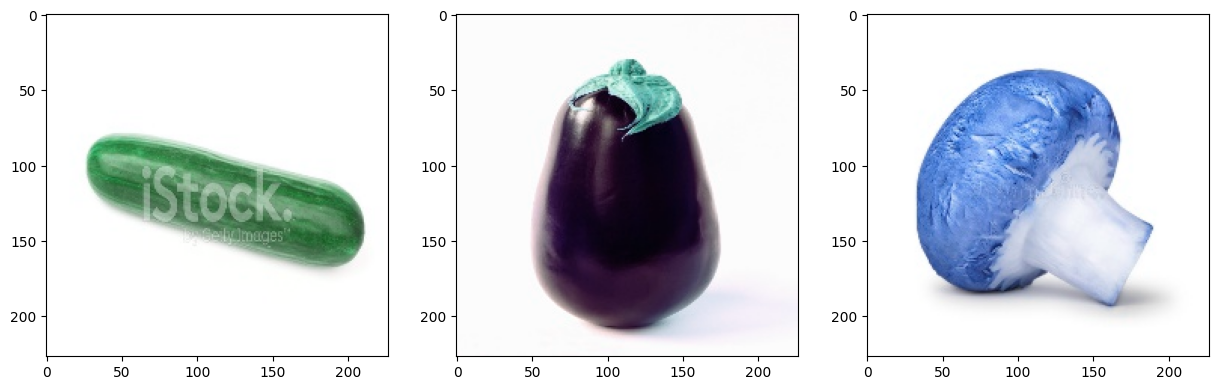

<Figure size 3000x2000 with 0 Axes>

In [96]:

cucu_1=cv2.imread(img_path[30],cv2.IMREAD_COLOR)
egg_1=cv2.imread(img_path[75],cv2.IMREAD_COLOR)
mush_1=cv2.imread(img_path[130],cv2.IMREAD_COLOR)
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplot(1,3,1)
plt.imshow(cucu_1)
plt.subplot(1,3,2)
plt.imshow(egg_1)
plt.subplot(1,3,3)
plt.imshow(mush_1)

plt.figure(figsize=(30,20))

In [97]:
cucu_1_rect=draw_rectangle(cucu_1,data[30][1:])
egg_1_rect=draw_rectangle(egg_1,data[75][1:])
mush_1_rect=draw_rectangle(mush_1,data[130][1:])

cucu_1_text=add_text_to_boundingbox(cucu_1_rect,1,data[30][1:],'cucumber')
egg_1_text=add_text_to_boundingbox(egg_1_rect,2,data[75][1:],'eggplant')
mush_1_text=add_text_to_boundingbox(mush_1_rect,3,data[130][1:],'mushroom')

<Figure size 3000x2000 with 0 Axes>

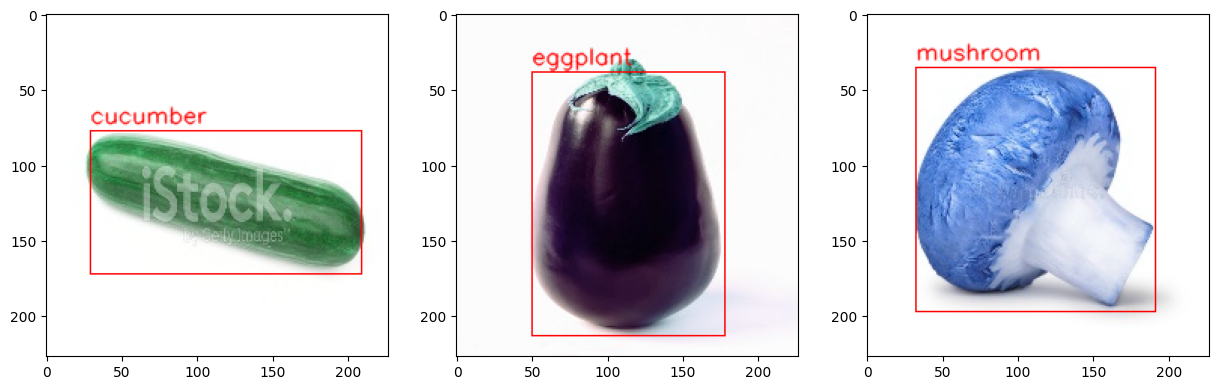

<Figure size 3000x2000 with 0 Axes>

In [98]:
plt.subplot(1,3,1)
plt.imshow(cucu_1_text)
plt.subplot(1,3,2)
plt.imshow(egg_1_text)
plt.subplot(1,3,3)
plt.imshow(mush_1_text)

plt.figure(figsize=(30,20))

In [32]:
len(img_path),len(data)

(186, 186)

In [33]:
img_path[0],data[0]

('/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/training_images/cucumber_1.jpg',
 [1, 23, 42, 206, 199])

In [34]:
type(img_path),type(data),len(img_path),len(data)

(list, list, 186, 186)

separating category output and bounding box output

In [35]:
images=[]
category_output=[]
boundingbox_ouput=[]

for i in img_path:
    images.append(cv2.imread(i,cv2.IMREAD_COLOR))

for j in data:
    category_output.append([j[0]])
    boundingbox_ouput.append([j[1],j[2],j[3],j[4]])



In [36]:
category_output[:2],boundingbox_ouput[:2]

([[1], [1]], [[23, 42, 206, 199], [13, 70, 219, 160]])

In [37]:
y=[[] for i in range(len(category_output))]

for i in range(len(category_output)):
    y[i].append(category_output[i][0])

    y[i]=y[i]+boundingbox_ouput[i]

y[:3]

[[1, 23, 42, 206, 199], [1, 13, 70, 219, 160], [1, 8, 42, 221, 200]]

In [38]:
images=np.array(images)
category_output=np.array(category_output)
boundingbox_ouput=np.array(boundingbox_ouput)
y=np.array(y)
images.shape,category_output.shape,boundingbox_ouput.shape,y.shape

((186, 227, 227, 3), (186, 1), (186, 4), (186, 5))

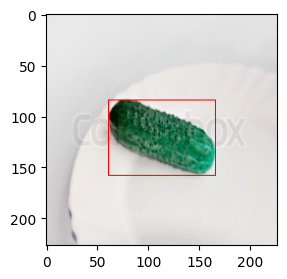

In [39]:
plt.rcParams['figure.figsize'] = (3,3)

i=50

img=draw_rectangle(np.copy(images[i]),boundingbox_ouput[i])
plt.imshow(img)


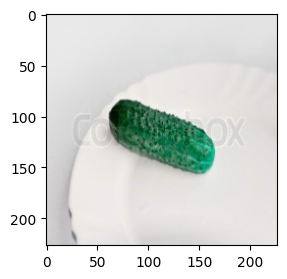

In [40]:
plt.imshow(images[50])

splitting the data

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,y,test_size=0.2,shuffle=True)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((148, 227, 227, 3), (38, 227, 227, 3), (148, 5), (38, 5))

In [43]:
y_train[:3]

array([[  2,  41,  58, 179, 157],
       [  3,  31,  21, 206, 227],
       [  3,  42,  24, 180, 213]])

In [44]:
y_train_cat=y_train[:,0:1]
y_train_bou=y_train[:,1:]

y_test_cat=y_test[:,0:1]
y_test_bou=y_test[:,1:]

In [45]:
y_train_cat[:3],y_test_bou[:3]

(array([[2],
        [3],
        [3]]),
 array([[ 60,  10, 196, 188],
        [ 54,  26, 185, 192],
        [  1,  17, 222, 226]]))

In [46]:
np.min(x_train[0]),np.max(x_train[0]),np.min(y_train_bou),np.max(y_train_bou)

(0, 255, 1, 227)

In [47]:
x_train=x_train/255
x_test=x_test/255

# y_train_bou=y_train_bou/227
# y_test_bou=y_test_bou/227

In [48]:
y_test_bou[:3],y_train_bou[:3]

(array([[ 60,  10, 196, 188],
        [ 54,  26, 185, 192],
        [  1,  17, 222, 226]]),
 array([[ 41,  58, 179, 157],
        [ 31,  21, 206, 227],
        [ 42,  24, 180, 213]]))

In [49]:
y_train_cat=tf.keras.utils.to_categorical(y_train_cat)
y_test_cat=tf.keras.utils.to_categorical(y_test_cat)

In [50]:
y_train_cat[:3],y_test_cat[:3]

(array([[0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]], dtype=float32),
 array([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.]], dtype=float32))

In [51]:
x_train.shape

(148, 227, 227, 3)

using MobileNetV2 model for building model




In [51]:
from keras import layers

In [52]:
 mobilenet_model = tf.keras.applications.MobileNetV2(
        input_shape=(227,227, 3), include_top=False, weights='imagenet'
    )

input=layers.Input(shape=(227,227,3))
x=mobilenet_model(input)

x=layers.Flatten()(x)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
out_cat=layers.Dense(4,activation='softmax',name='classification')(x)
out_bou=layers.Dense(4,name='regression',)(x)


model=tf.keras.models.Model(inputs=input,outputs=[out_cat,out_bou])
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenetv2_1.00_224 (Function  (None, 8, 8, 1280)  2257984     ['input_2[0][0]']                
 al)                                                                                              
                                                                                                  
 flatten (Flatten)              (None, 81920)        0           ['mobilenetv2_1.00_224[0][0]']   
                               

In [53]:
model=tf.keras.models.Model(inputs=input,outputs=[out_cat,out_bou])

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss={'classification': 'categorical_crossentropy',
                  'regression':'mse'},
             metrics = {
                'classification':'accuracy',
                'regression':'mse'
             })

In [55]:
result=model.fit(x_train,[y_train_cat,y_train_bou],epochs=100,validation_data=(x_test,[y_test_cat,y_test_bou]))

Epoch 1/100
5/5 [==============================] - 55s 952ms/step - loss: 16825.1875 - classification_loss: 10.9901 - regression_loss: 16814.1973 - classification_accuracy: 0.3041 - regression_mse: 16814.1973 - val_loss: 14174.8027 - val_classification_loss: 18.3523 - val_regression_loss: 14156.4502 - val_classification_accuracy: 0.4474 - val_regression_mse: 14156.4502
Epoch 2/100
5/5 [==============================] - 1s 158ms/step - loss: 9389.7939 - classification_loss: 43.2924 - regression_loss: 9346.5020 - classification_accuracy: 0.3108 - regression_mse: 9346.5020 - val_loss: 8747.8809 - val_classification_loss: 36.9447 - val_regression_loss: 8710.9355 - val_classification_accuracy: 0.4474 - val_regression_mse: 8710.9355
Epoch 3/100
5/5 [==============================] - 1s 156ms/step - loss: 4015.4929 - classification_loss: 81.9187 - regression_loss: 3933.5747 - classification_accuracy: 0.3108 - regression_mse: 3933.5747 - val_loss: 5012.2910 - val_classification_loss: 55.0007 -

In [52]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/model2.h5')
model.evaluate(x_test,[y_test_cat,y_test_bou])

2/2 [==============================] - 9s 412ms/step - loss: 63.8432 - classification_loss: 0.0479 - regression_loss: 63.7952 - classification_accuracy: 0.9474 - regression_mse: 63.7952


[63.843177795410156,
 0.04794997721910477,
 63.795230865478516,
 0.9473684430122375,
 63.795230865478516]

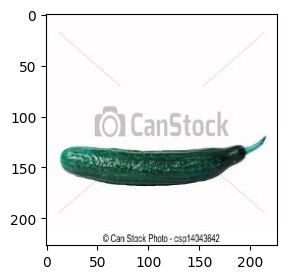

In [57]:
plt.rcParams['figure.figsize'] = (3,3)
plt.imshow(x_test[5])
# y_test[0].shape


In [53]:
model.get_config()['layers'][0]

{'class_name': 'InputLayer',
 'config': {'batch_input_shape': (None, 227, 227, 3),
  'dtype': 'float32',
  'sparse': False,
  'ragged': False,
  'name': 'input_2'},
 'name': 'input_2',
 'inbound_nodes': []}

Function use to predict result

In [62]:
def add_text_to_boundingbox(img,bounds,t,color='red'):
    colors={'red':(255,0,0),'green':(0,255,0),'blue':(0,0,255)}
    c=colors.get(color.lower(),(255,0,0))
    print(bounds,bounds.shape)
    return cv2.putText(img,t,(int(bounds[0]),int(bounds[1])-5),cv2.FONT_HERSHEY_SIMPLEX, .5,c,1,cv2.LINE_AA)


In [63]:
def show_result(img,model,b):
    bound=model.predict(img.reshape(1,227, 227, 3))[1][0]

    x= draw_rectangle(img,bound)

    x=add_text_to_boundingbox(x,bound,'predicted')


    x=draw_rectangle(x,b,'green')
    plt.imshow( add_text_to_boundingbox(x,b,'original',color='green'))
    plt.title('iou'+str(intersection_over_union(bound,b)))

In [64]:
def intersection_over_union(pred_box, true_box):

    xmin_pred, ymin_pred, xmax_pred, ymax_pred =  pred_box
    xmin_true, ymin_true, xmax_true, ymax_true = true_box

    #Calculate coordinates of overlap area between boxes
    xmin_overlap = np.maximum(xmin_pred, xmin_true)
    xmax_overlap = np.minimum(xmax_pred, xmax_true)
    ymin_overlap = np.maximum(ymin_pred, ymin_true)
    ymax_overlap = np.minimum(ymax_pred, ymax_true)

    #Calculates area of true and predicted boxes
    pred_box_area = (xmax_pred - xmin_pred) * (ymax_pred - ymin_pred)
    true_box_area = (xmax_true - xmin_true) * (ymax_true - ymin_true)

    #Calculates overlap area and union area.
    overlap_area = np.maximum((xmax_overlap - xmin_overlap),0)  * np.maximum((ymax_overlap - ymin_overlap), 0)
    union_area = (pred_box_area + true_box_area) - overlap_area

    # Defines a smoothing factor to prevent division by 0
    smoothing_factor = 1e-10

    #Updates iou score
    iou = (overlap_area + smoothing_factor) / (union_area + smoothing_factor)

    return iou

1/1 [==============================] - 0s 27ms/step


[ 31.750923  42.429882 188.41315  208.05771 ] (4,)
[ 29  36 171 198] (4,)


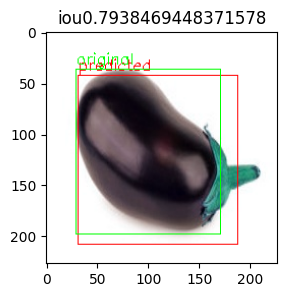

In [66]:
show_result(np.copy(x_test[20]),model,y_test_bou[20])
# y_test_bou[20]

Predictions

In [59]:
pred=np.array(model.predict(x_train[50].reshape((1,227, 227, 3))))

1/1 [==============================] - 0s 41ms/step


In [61]:
pred[1][0],pred.shape

(array([ 12.779054,  94.16293 , 161.69801 , 184.6749  ], dtype=float32),
 (2, 1, 4))

1/1 [==============================] - 0s 25ms/step


[ 54.357243  73.02607  177.04361  188.40121 ] (4,)
[ 29  36 171 198] (4,)


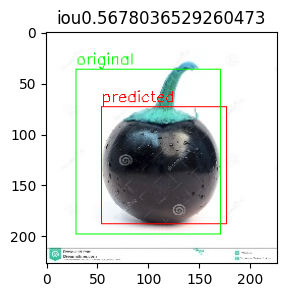

In [67]:
show_result(np.copy(x_test[30]),model,y_test_bou[20])

In [98]:
bound=pred[1][0]
bound

array([ 26.245712,  33.327557, 151.213   , 178.14476 ], dtype=float32)

1/1 [==============================] - 0s 90ms/step


[  8.641818  16.28736  198.34145  206.42374 ] (4,)
[ 29  36 171 198] (4,)


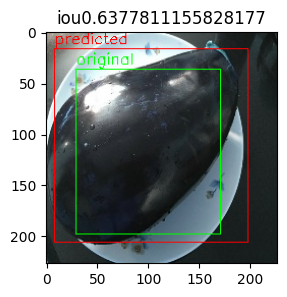

In [68]:
show_result(np.copy(x_test[6]),model,y_test_bou[20])

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/localisation/model1.h5')

In [ ]:
images.shape,y.shape

In [ ]:
y[:3]

In [ ]:
y_cat=y[:,:1]
y_bou=y[:,1:]

y_cat[:3],y_bou[:3]

In [ ]:
y_cat=tf.keras.utils.to_categorical(y_cat)
y_cat[:3]

In [ ]:
images=images/255

Training model with whole dataset

In [ ]:
result=model.fit(images,[y_cat,y_bou],epochs=100,validation_data=(images,[y_cat,y_bou]))

In [ ]:
plt.imshow(result_predict(np.copy(images[36])))

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/localisation/localisation -veg/model2.h5')

In [ ]:
def result_predict(image,model):
    # image=image.reshape((1,227,227,3))
    res=model.predict(image.reshape((1,227,227,3)))
    cat=np.argmax(res[0][0])
    name=label_to_name[cat]
    print(res)
    return add_text_to_boundingbox(draw_rectangle(image,res[1][0]),cat,res[1][0])


In [ ]:
plt.imshow(result_predict(images[154],model))